In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/workflow_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   100 non-null    int64  
 1   user_id              100 non-null    int64  
 2   version_no           100 non-null    int64  
 3   name                 100 non-null    object 
 4   description          99 non-null     object 
 5   created_at           100 non-null    object 
 6   updated_at           100 non-null    object 
 7   applications         100 non-null    object 
 8   categories           100 non-null    object 
 9   business_objects     100 non-null    object 
 10  runnable             100 non-null    bool   
 11  running              100 non-null    bool   
 12  job_succeeded_count  100 non-null    int64  
 13  job_failed_count     100 non-null    int64  
 14  parent_id            69 non-null     float64
dtypes: bool(2), float64(1), int64(5), object(

# Data Profiling

### Missingness & Uniqueness Analysis

In [4]:
na_counts = df.isna().sum()
unique_counts = df.nunique()
na_summary = pd.DataFrame({'Unique Count': unique_counts,'NaN Count': na_counts})
na_summary_sorted = na_summary.sort_values(by='Unique Count', ascending=True)
print(na_summary_sorted)


                     Unique Count  NaN Count
runnable                        1          0
running                         2          0
job_failed_count                7          0
version_no                     14          0
job_succeeded_count            19          0
business_objects               52          0
user_id                        57          0
categories                     57          0
parent_id                      62         31
description                    63          1
applications                   73          0
name                           84          0
id                            100          0
created_at                    100          0
updated_at                    100          0


### Duplicate checks

In [7]:
dupes = df.duplicated().sum()
print(f'Number of duplicate rows: {dupes}')


Number of duplicate rows: 0


### Descriptive Stats

In [8]:
df.describe()


,id,user_id,version_no,job_succeeded_count,job_failed_count,parent_id
count,1.000000e+02,100.000000,100.00000,100.000000,100.000000,69.000000
mean,8.703324e+06,53499.210000,3.69000,83.680000,0.750000,569770.304348
std,9.838677e+05,21067.741583,5.57537,460.282344,3.508647,300989.698078
min,1.890806e+06,168.000000,1.00000,0.000000,0.000000,331.000000
25%,8.830700e+06,40990.000000,1.00000,0.000000,0.000000,382637.000000
50%,8.830749e+06,64555.500000,1.00000,0.000000,0.000000,493056.000000
75%,8.830798e+06,69927.000000,3.00000,1.000000,0.000000,888537.000000
max,9.890804e+06,72284.000000,37.00000,3748.000000,23.000000,904879.000000


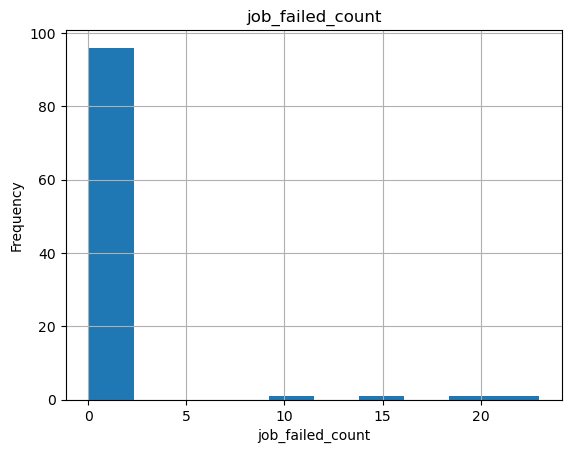

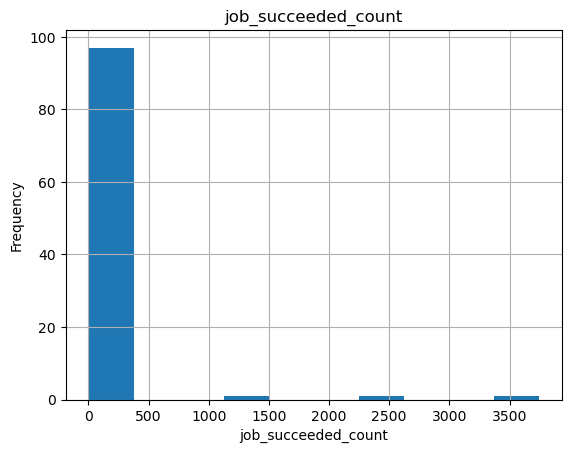

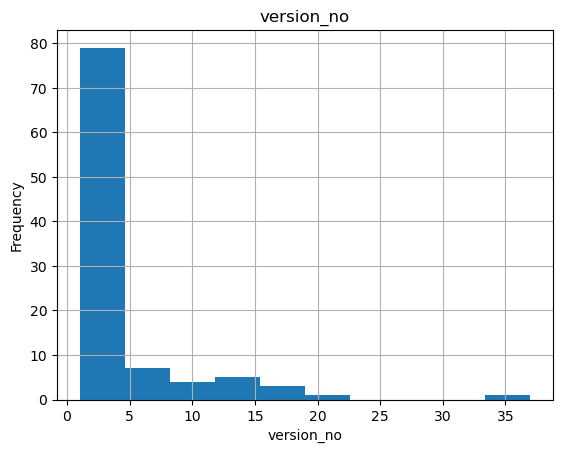

In [13]:
import matplotlib.pyplot as plt

col_numeric = ['job_failed_count', 'job_succeeded_count', 'version_no']

for col in col_numeric:
    plt.figure()                    # start a new figure
    df[col].hist()                  # plot the histogram
    plt.title(col)                  # optional: label it
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()                      


### Text & length profiling

In [12]:
df['desc_len'] = df['description'].fillna('').str.len()
df['name_len'] = df['name'].str.len()
df[['desc_len','name_len']].describe()

,desc_len,name_len
count,100.000000,100.00000
mean,238.350000,47.79000
std,585.044147,24.67866
min,0.000000,10.00000
25%,40.000000,26.75000
50%,68.500000,48.50000
75%,92.250000,64.25000
max,3638.000000,142.00000


### Multi-field analysis

In [ ]:
df['applications_list'] = (
    df['applications']
      .str.strip('{}')
      .str.split(',')
      .apply(lambda lst: sorted(set(x.strip() for x in lst)))
)

unique_apps = set(df['applications_list'].explode())
print(unique_apps)

app_counts = df['applications_list'] \
                .explode() \
                .value_counts() \
                .sort_index()
print(app_counts)

df.drop(columns=['applications_list'], inplace=True)


5 rows with an empty element
   applications applications_list
16                             []
47                             []
89                             []
92                             []
99                             []


In [ ]:
df['business_objects_list'] = (
    df['business_objects']
      .str.strip('{}')
      .str.split(',')
      .apply(lambda lst: sorted(set(x.strip() for x in lst)))
)

unique_objs = set(df['business_objects_list'].explode())
print(unique_objs)

obj_counts = df['business_objects_list'] \
                .explode() \
                .value_counts() \
                .sort_index()
print(obj_counts)

df.drop(columns=['business_objects_list'], inplace=True)


27 rows with an empty element
   business_objects business_objects_list
6                {}                    []
7                {}                    []
8                {}                    []
10               {}                    []
12               {}                    []
13               {}                    []
14               {}                    []
16               {}                    []
19               {}                    []
20               {}                    []
23               {}                    []
28               {}                    []
39               {}                    []
47               {}                    []
48               {}                    []
53               {}                    []
54               {}                    []
56               {}                    []
63               {}                    []
66               {}                    []
81               {}                    []
84               {}                    []
88  

In [27]:
df['categories_list'] = (
    df['categories']
      .str.strip('{}')
      .str.split(',')
      .apply(lambda lst: sorted(set(x.strip() for x in lst)))
)

unique_objs = set(df['categories_list'].explode())
print(unique_objs)

obj_counts = df['categories_list'] \
                .explode() \
                .value_counts() \
                .sort_index()
print(obj_counts)

df.drop(columns=['categories_list'], inplace=True)


{'"API Integration"', '', 'Collaboration', 'Database', 'ERP', '"Time and Expense"', '"Financial Management"', 'Communication', 'Ecommerce', 'Document/File', '"Customer Service"', '"HR management"', '"Project Management"', 'Productivity', '"Artificial Intelligence"', 'CRM', 'Marketing', 'Bots', '"Event management"', '"Developer Tool"', '"File Transfer"', 'Accounting', '"Data Parser"', '"Recipe Tools"'}
                              5
"API Integration"            14
"Artificial Intelligence"    31
"Customer Service"            7
"Data Parser"                 6
"Developer Tool"             20
"Event management"            2
"File Transfer"               1
"Financial Management"        2
"HR management"               3
"Project Management"         16
"Recipe Tools"               42
"Time and Expense"            7
Accounting                   14
Bots                         31
CRM                          34
Collaboration                 1
Communication                 1
Database           